# Load Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split



import numpy as np

import pandas as pd

image_path = "dataset_train/dataset/"

ler os dados com o image_dataset_from_directory

subset="training"
subset="validation"
-> Se forem seguidos, o gajo separa automaticamente

# Load Data

In [36]:
def loadDataSet(path):
    def loadImages(path):
        # literalmente dar load das imagens todas para estes arrays
        # Listas por compreencao for life <3
        real = [image.load_img(image_path+"/real/"+file,target_size = (32,32), color_mode='grayscale') for file in os.listdir(image_path+"/real")]
        fake = [image.load_img(image_path+"/fake/"+file,target_size = (32,32), color_mode='grayscale') for file in os.listdir(image_path+"/fake")]
        return real,fake

    def imagesToArray(imgs):
        return np.array([image.img_to_array(img)[:,:,0] for img in imgs])
    
    real,fake = loadImages(path)
    real_array = imagesToArray(real)
    fake_array = imagesToArray(fake)
    return real_array,fake_array
  
real,fake = loadDataSet(image_path)
len(real),len(fake)

(20000, 20000)

# Train Val Test

In [37]:
X = np.append(real,fake,axis=0)
y = np.append(np.ones((20000,1)),np.zeros((20000,1)))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=13)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=13)
print(len(X_train), len(y_train))
print("Train -> {} [{}%] ".format(len(y_train),len(y_train)/40000*100))
print("Val   -> {} [{}%] ".format(len(y_val),len(y_val)/40000*100))
print("Test  -> {} [{}%] ".format(len(y_test),len(y_test)/40000*100))


24000 24000
Train -> 24000 [60.0%] 
Val   -> 8000 [20.0%] 
Test  -> 8000 [20.0%] 


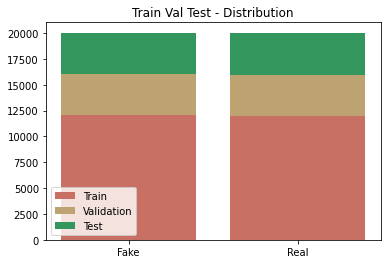

In [4]:
_, frequency_train = np.unique(y_train, return_counts = True)
_, frequency_val = np.unique(y_val, return_counts = True)
_, frequency_test = np.unique(y_test, return_counts = True)

plt.bar(["Fake","Real"], frequency_train,label ='Train',color="#C97064")
plt.bar(["Fake","Real"], frequency_val,label ='Validation',color="#BCA371",bottom=frequency_train)
plt.bar(["Fake","Real"], frequency_test,label ='Test',color="#32965D",bottom=np.add(frequency_train, frequency_test))
plt.legend()
plt.title("Train Val Test - Distribution")
plt.show()

# Model

https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

https://towardsdatascience.com/deep-learning-googlenet-explained-de8861c82765

In [5]:
model = Sequential()
model.add(Conv2D(32,1,padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 1, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 1, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0

In [6]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

c:\users\tferr\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [8]:
history = model.fit(X_train,y_train,epochs = 500 , validation_data = (X_val, y_val))

Epoch 1/500


c:\users\tferr\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


693/750 [==========================>...] - ETA: 0s - loss: 8.0645 - accuracy: 0.4976

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_test, predictions, target_names = ['Fake (Class 0)','Real (Class 1)']))

In [ ]:
image_path = "dataset_test/dataset_test"

def loadTestSet(path):
    def loadImages(path):
        # literalmente dar load das imagens todas para estes arrays
        # Listas por compreencao for life <3
        images = [image.load_img(image_path+"/images/"+file,target_size = (28,28), color_mode='grayscale') for file in sorted(os.listdir(image_path+"/images"))]
        return images

    def imagesToArray(imgs):
        return np.array([image.img_to_array(img)[:,:,0] for img in imgs])
    
    images = loadImages(path)
    images_array = imagesToArray(images)
    return images_array
  
test_set = loadTestSet(image_path)

In [ ]:
test_set = test_set.reshape(-1, 28, 28, 1)
predictions = model.predict_classes(test_set)
predictions

In [ ]:
ids = [img.split(".")[0] for img in sorted(os.listdir("dataset_test/dataset_test/images"))]

In [ ]:
submition = pd.DataFrame((np.array([ids,predictions]).T),columns= ["Id","Category"])
submition = submition.astype(int).sort_values("Id")
submition.to_csv("Submition.csv",index=False)

In [ ]:
model.save('first_model')

In [ ]:
reconstructed_model = keras.models.load_model("first_model")
model.predict_classes(test_set)


## Model 2 - Fashion MNIST

https://github.com/radenjezic153/Stat_ML/blob/master/project.ipynb

https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf

In [3]:
# example of loading the inception v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_height = 28
img_width = 28

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\tferr\\Desktop\\ACA\\Projeto\\Project_Assignment_To_Students\\To_Students\\dataset_train\\dataset",
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    color_mode='grayscale',
    seed=123
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\tferr\\Desktop\\ACA\\Projeto\\Project_Assignment_To_Students\\To_Students\\dataset_train\\dataset",
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    color_mode='grayscale',
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\tferr\\Desktop\\ACA\\Projeto\\Project_Assignment_To_Students\\To_Students\\dataset_test\\dataset_test",
    image_size=(img_height, img_width),
    color_mode='grayscale',
)

print(train_ds.class_names)

Found 40000 files belonging to 2 classes.
Using 32000 files for training.
Found 40000 files belonging to 2 classes.
Using 8000 files for validation.
Found 2000 files belonging to 1 classes.
['fake', 'real']


In [9]:
# load model
cnn_model = Sequential()
cnn_model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D())
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
# summarize the model
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [10]:
n_epochs = 100

cnn_model_training = cnn_model.fit(
    train_ds,
    epochs=n_epochs,
    validation_data=validation_ds
)

Epoch 1/100
1000/1000 [==============================] - 34s 33ms/step - loss: 1.7063 - accuracy: 0.5642 - val_loss: 0.6246 - val_accuracy: 0.6254
Epoch 2/100
1000/1000 [==============================] - 39s 39ms/step - loss: 0.5969 - accuracy: 0.6389 - val_loss: 0.5274 - val_accuracy: 0.6914
Epoch 3/100
1000/1000 [==============================] - 37s 37ms/step - loss: 0.5487 - accuracy: 0.6697 - val_loss: 0.4900 - val_accuracy: 0.7136
Epoch 4/100
1000/1000 [==============================] - 36s 36ms/step - loss: 0.5236 - accuracy: 0.6868 - val_loss: 0.4740 - val_accuracy: 0.7169
Epoch 5/100
1000/1000 [==============================] - 35s 35ms/step - loss: 0.5033 - accuracy: 0.7003 - val_loss: 0.4511 - val_accuracy: 0.7308
Epoch 6/100
1000/1000 [==============================] - 34s 34ms/step - loss: 0.4836 - accuracy: 0.7166 - val_loss: 0.4481 - val_accuracy: 0.7331
Epoch 7/100
1000/1000 [==============================] - 37s 37ms/step - loss: 0.4664 - accuracy: 0.7278 - val_loss: 0

1000/1000 [==============================] - 31s 31ms/step - loss: 0.1053 - accuracy: 0.9561 - val_loss: 0.1042 - val_accuracy: 0.9643
Epoch 57/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.1111 - accuracy: 0.9553 - val_loss: 0.0977 - val_accuracy: 0.9625
Epoch 58/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.1088 - accuracy: 0.9567 - val_loss: 0.0968 - val_accuracy: 0.9638
Epoch 59/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.1004 - accuracy: 0.9595 - val_loss: 0.0892 - val_accuracy: 0.9660
Epoch 60/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.1009 - accuracy: 0.9599 - val_loss: 0.0914 - val_accuracy: 0.9647
Epoch 61/100
1000/1000 [==============================] - 31s 30ms/step - loss: 0.1005 - accuracy: 0.9613 - val_loss: 0.0961 - val_accuracy: 0.9650
Epoch 62/100
1000/1000 [==============================] - 31s 31ms/step - loss: 0.1008 - accuracy: 0.9603 - val_loss: 0.0884 

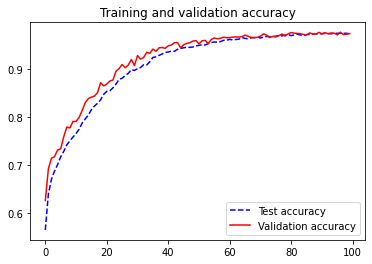

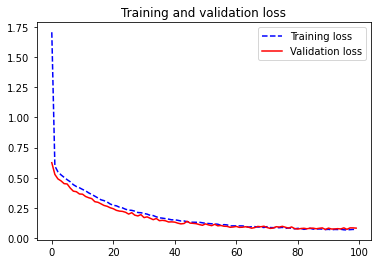

In [12]:
# print(cnn_model_training.history)

cnn_accuracy     = cnn_model_training.history['accuracy']
cnn_val_accuracy = cnn_model_training.history['val_accuracy']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (n_epochs)]

plt.plot(epochs, cnn_accuracy, 'b--', label='Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig(f'Accuracy values Model Tiago - {n_epochs} epochs')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(f'Loss values Model Tiago - {n_epochs} epochs')
plt.show()

In [13]:
accuracy = cnn_model.evaluate(test_ds)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))

63/63 [==============================] - 1s 16ms/step - loss: 18.2094 - accuracy: 0.5160
The accuracy of CNN is equal to : 0.515999972820282


In [20]:
cnn_model.save('model_2')

INFO:tensorflow:Assets written to: model_2\assets
